<a href="https://colab.research.google.com/github/nedlecky/CSC485B/blob/main/CSC485_110_ThermocoupleConverter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 485B Spring 2023: CSC485_110_ThermocoupleConverter using Linear Regression!
## (Thermocouples are linear, right??)
* SUNY Plattsburgh, Spring 2023
* Dr. Ned Lecky
* nleck001@plattsburgh.edu
* ned@lecky.com

In [1]:
import numpy as np

# Pt-10% Rh Thermocouple data from Applied Numerical Methods, Carnahan, Luther, and Wilkes ISBN 471-13507-0

# EMF(mV) , Temperature(F)
x = np.array([0,300,500,1000,1500,1700,2000,2500,3000,3300,3500,4000,4500,5000,5300,5500,5900,6000], dtype='f')
y = np.array([32.0,122.4,176.0,296.4,405.7,447.6,509.0,608.4,704.7,761.4,799.0,891.9,983.0,1072.6,1125.7,1160.8,1230.3,1247.5])


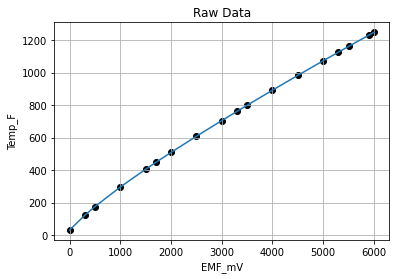

In [2]:
# Let's take a look at the sample data
import matplotlib.pyplot as plt

plt.scatter(x,y, color='black')
plt.plot(x,y)

plt.title('Raw Data')
plt.xlabel('EMF_mV')
plt.ylabel('Temp_F')
plt.grid()
plt.show()


In [3]:
# I guess it looks sort of linear. Let's try...

# For n inputs and m outputs with N examples... (Note here n=m=1 and N=2)
# We need X to be an Nxn matrix and Y to be an Nxm matrix
n=1 # 1 input
m=1 # 1 output
N = x.shape[0]
X = x.reshape(N,n)
Y = y.reshape(N,m)
print(f"N={N} n={n} m={m}")


N=18 n=1 m=1


Coefficients: [0.197]
Offsets: [90.905]
In other words, Temp, F = [0.197] * X + [90.905]
Mean squared error: 526.05
Mean absolute error: 19.65
Mean absolute percentage error: 0.14
        deltaT_F
count  18.000000
mean   -0.000016
std    23.600665
min   -24.787329
25%   -19.883249
50%    -6.816577
75%    13.907935
max    58.905151


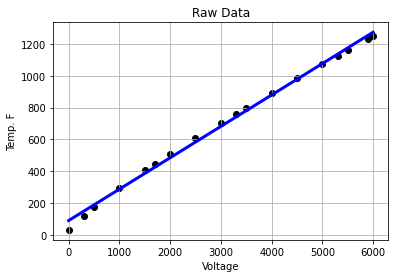

In [4]:
# Traditional linear regression fit...
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd

def try_linear(X_in):
  regr = linear_model.LinearRegression()
  regr.fit(X_in, Y)

  np.set_printoptions(precision=3) # This seems to be necessary
  print(f"Coefficients: {regr.coef_[0]}")
  print(f"Offsets: {regr.intercept_}")
  print(f"In other words, Temp, F = {regr.coef_[0]} * X + {regr.intercept_}")

  Y_pred = regr.predict(X_in)
  print(f"Mean squared error: {mean_squared_error(Y, Y_pred):.2f}")
  print(f"Mean absolute error: {mean_absolute_error(Y, Y_pred):.2f}")
  print(f"Mean absolute percentage error: {mean_absolute_percentage_error(Y, Y_pred):.2f}")

  # Put error in pandas so we can use .describe()
  e = pd.DataFrame(Y_pred-Y, columns=['deltaT_F'])
  print(e.describe())
  # Probably not very good performance!

  # Plot original and predicted
  plt.scatter(X, Y, color="black")
  plt.plot(X, Y_pred, color="blue", linewidth=3)
  plt.title('Raw Data')
  plt.xlabel('Voltage')
  plt.ylabel('Temp. F')
  plt.grid()
  plt.show()

try_linear(X)


# So, LinearRegression isn't really too appropriate here

In [5]:
# One way to do "nonlinear regression" is to add additional nonlinear versions of X to it...
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_add_poly=poly.fit_transform(X)
print(X)
X_add_poly

[[   0.]
 [ 300.]
 [ 500.]
 [1000.]
 [1500.]
 [1700.]
 [2000.]
 [2500.]
 [3000.]
 [3300.]
 [3500.]
 [4000.]
 [4500.]
 [5000.]
 [5300.]
 [5500.]
 [5900.]
 [6000.]]


array([[1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 3.000e+02, 9.000e+04],
       [1.000e+00, 5.000e+02, 2.500e+05],
       [1.000e+00, 1.000e+03, 1.000e+06],
       [1.000e+00, 1.500e+03, 2.250e+06],
       [1.000e+00, 1.700e+03, 2.890e+06],
       [1.000e+00, 2.000e+03, 4.000e+06],
       [1.000e+00, 2.500e+03, 6.250e+06],
       [1.000e+00, 3.000e+03, 9.000e+06],
       [1.000e+00, 3.300e+03, 1.089e+07],
       [1.000e+00, 3.500e+03, 1.225e+07],
       [1.000e+00, 4.000e+03, 1.600e+07],
       [1.000e+00, 4.500e+03, 2.025e+07],
       [1.000e+00, 5.000e+03, 2.500e+07],
       [1.000e+00, 5.300e+03, 2.809e+07],
       [1.000e+00, 5.500e+03, 3.025e+07],
       [1.000e+00, 5.900e+03, 3.481e+07],
       [1.000e+00, 6.000e+03, 3.600e+07]], dtype=float32)

Coefficients: [ 0.000e+00  2.392e-01 -6.855e-06]
Offsets: [52.068]
In other words, Temp, F = [ 0.000e+00  2.392e-01 -6.855e-06] * X + [52.068]
Mean squared error: 59.89
Mean absolute error: 6.26
Mean absolute percentage error: 0.05
        deltaT_F
count  18.000000
mean   -0.000022
std     7.962984
min   -11.956824
25%    -5.995819
50%     0.251471
75%     5.174207
max    20.067688


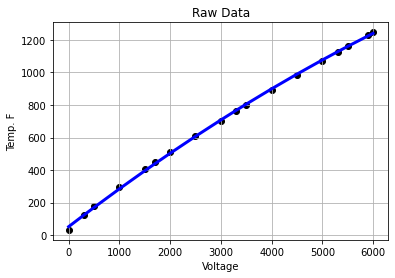

In [6]:
try_linear(X_add_poly)

Coefficients: [ 0.000e+00 -4.245e-12  8.480e-12  2.176e-08 -2.926e-12]
Offsets: [264.412]
In other words, Temp, F = [ 0.000e+00 -4.245e-12  8.480e-12  2.176e-08 -2.926e-12] * X + [264.412]
Mean squared error: 9267.16
Mean absolute error: 82.63
Mean absolute percentage error: 0.58
         deltaT_F
count   18.000000
mean    -0.000192
std     99.056990
min   -118.342169
25%    -80.913565
50%    -27.007816
75%     67.847803
max    232.411682


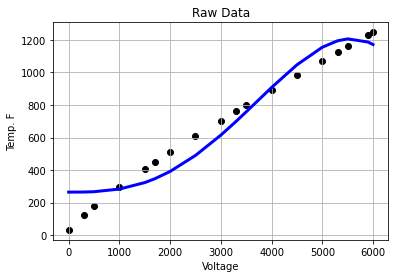

In [8]:
# That's better!
# Maybe try 3-order poly??
poly = PolynomialFeatures(3)
X_add_poly=poly.fit_transform(X)
try_linear(X_add_poly)
# And now it's bizarre
